# Project 2-1. load_digits - 손글씨 분류

### (1) 필요한 모듈 import

In [93]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd

### (2) 데이터 준비

In [94]:
#데이터를 로드
digits = load_digits()

In [95]:
#데이터 Feature Data와 Label Data로 지정
digits_data = digits.data
digits_label = digits.target

#데이터 확인
print('Feature Data Shape : ', digits_data.shape) 
print('Label Data Shape : ', digits_label.shape)

#Target Names 확인
print('Target Names : ', digits.target_names)

Feature Data Shape :  (1797, 64)
Label Data Shape :  (1797,)
Target Names :  [0 1 2 3 4 5 6 7 8 9]


In [96]:
# Data Describe
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

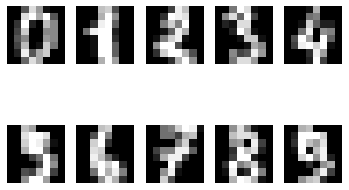

In [97]:
# 이미지 데이터 확인
import matplotlib.pyplot as plt

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(digits.data[i].reshape(8, 8), cmap='gray')
    plt.axis('off')
plt.show()

### (3) train, test 데이터 나누기

In [98]:
# scikit-learn의 train_test_split 메소드 사용
X_train, X_test, y_train, y_test = train_test_split(digits_data,
                                                   digits_label,
                                                   test_size=0.2,
                                                   random_state=777)

#train : test = 8 : 2
print('X_train의 개수 : ', len(X_train), ', X_test 개수 : ', len(X_test))
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

X_train의 개수 :  1437 , X_test 개수 :  360
(1437, 64) (1437,)
(360, 64) (360,)


### (4) 모델 별 학습 및 평가

#### ① Decision Tree

In [99]:
decision_tree = DecisionTreeClassifier(random_state=777)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        38
           1       0.72      0.86      0.78        36
           2       0.83      0.75      0.79        32
           3       0.79      1.00      0.89        27
           4       0.73      0.84      0.78        32
           5       0.95      0.86      0.90        42
           6       0.91      0.89      0.90        36
           7       0.87      0.87      0.87        39
           8       0.93      0.70      0.80        40
           9       0.86      0.84      0.85        38

    accuracy                           0.85       360
   macro avg       0.86      0.86      0.85       360
weighted avg       0.86      0.85      0.85       360

[[36  0  0  0  2  0  0  0  0  0]
 [ 0 31  2  0  1  0  0  1  1  0]
 [ 0  2 24  3  0  1  1  1  0  0]
 [ 0  0  0 27  0  0  0  0  0  0]
 [ 1  1  0  0 27  0  1  2  0  0]
 [ 0  0  0  1  0 36  0  0  1  4]
 [ 0  0  0  0  4  0 32  0  0  0]
 [ 0  1  1

#### ② Random Forest

In [100]:
random_forest = RandomForestClassifier(random_state = 777)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       0.84      1.00      0.91        36
           2       1.00      0.94      0.97        32
           3       0.93      1.00      0.96        27
           4       1.00      0.97      0.98        32
           5       0.98      0.95      0.96        42
           6       1.00      1.00      1.00        36
           7       0.97      0.97      0.97        39
           8       1.00      0.88      0.93        40
           9       0.95      0.95      0.95        38

    accuracy                           0.96       360
   macro avg       0.97      0.97      0.96       360
weighted avg       0.97      0.96      0.96       360

[[38  0  0  0  0  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  0  0]
 [ 0  2 30  0  0  0  0  0  0  0]
 [ 0  0  0 27  0  0  0  0  0  0]
 [ 0  0  0  0 31  0  0  1  0  0]
 [ 0  0  0  1  0 40  0  0  0  1]
 [ 0  0  0  0  0  0 36  0  0  0]
 [ 0  0  0

####  ③ SVM

In [101]:
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       0.92      1.00      0.96        36
           2       1.00      1.00      1.00        32
           3       1.00      1.00      1.00        27
           4       1.00      1.00      1.00        32
           5       0.95      0.98      0.96        42
           6       1.00      1.00      1.00        36
           7       1.00      0.97      0.99        39
           8       1.00      0.93      0.96        40
           9       0.95      0.95      0.95        38

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

[[38  0  0  0  0  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  0  0]
 [ 0  0 32  0  0  0  0  0  0  0]
 [ 0  0  0 27  0  0  0  0  0  0]
 [ 0  0  0  0 32  0  0  0  0  0]
 [ 0  0  0  0  0 41  0  0  0  1]
 [ 0  0  0  0  0  0 36  0  0  0]
 [ 0  0  0

#### ④ SGD Classifier

In [102]:
sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        38
           1       0.80      0.97      0.88        36
           2       1.00      1.00      1.00        32
           3       0.93      1.00      0.96        27
           4       1.00      0.94      0.97        32
           5       0.98      0.95      0.96        42
           6       0.95      0.97      0.96        36
           7       0.97      0.92      0.95        39
           8       1.00      0.70      0.82        40
           9       0.86      0.97      0.91        38

    accuracy                           0.94       360
   macro avg       0.95      0.94      0.94       360
weighted avg       0.95      0.94      0.94       360

[[38  0  0  0  0  0  0  0  0  0]
 [ 0 35  0  1  0  0  0  0  0  0]
 [ 0  0 32  0  0  0  0  0  0  0]
 [ 0  0  0 27  0  0  0  0  0  0]
 [ 0  0  0  0 30  0  1  1  0  0]
 [ 0  0  0  0  0 40  0  0  0  2]
 [ 0  1  0  0  0  0 35  0  0  0]
 [ 0  0  0

#### ⑤ Logistic Regression

In [103]:
logistic_model = LogisticRegression(max_iter=2700)
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       0.86      1.00      0.92        36
           2       0.97      0.97      0.97        32
           3       0.93      0.96      0.95        27
           4       0.97      0.97      0.97        32
           5       0.93      0.93      0.93        42
           6       1.00      0.97      0.99        36
           7       0.97      0.95      0.96        39
           8       1.00      0.82      0.90        40
           9       0.88      0.92      0.90        38

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360

[[38  0  0  0  0  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  0  0]
 [ 0  1 31  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  1]
 [ 0  0  0  0 31  0  0  1  0  0]
 [ 0  0  0  1  0 39  0  0  0  2]
 [ 0  1  0  0  0  0 35  0  0  0]
 [ 0  0  0

### Project 2-1. 정리

* 8x8 손글씨 이미지 데이터 1797개를 이용해 숫자 0부터 9까지의 10개 클래스로 분류하는 문제다.
* 가장 성능이 낮은 모델은 정확도가 0.86인 Decision Tree모델이다. 정답 레이블은 8인데 예측 레이블은 다른 값으로 예측한 경우와 정답 레이블은 다른 값인데 예측 레이블이 9인 경우가 많이 발생했다.
* 반면 가장 성능이 좋은 모델은 정확도가 0.99인 SVM모델이다. 전체 Test 데이터 360개 중 잘못 예측한 경우가 4번밖에 발생하지 않았다.
* 그 외 다른 모델들도 0.9이상의 정확도가 나왔다.

#### → 최종 모델은 SVM모델이다.

------------------------------------------------------------------------

# 프로젝트 2-2 load_wine - 와인 분류

### (1) 데이터 준비

In [104]:
from sklearn.datasets import load_wine

#데이터를 로드
wine = load_wine()

### (2) 데이터 확인

In [105]:
#데이터 Feature Data와 Label Data로 지정
wine_data = wine.data
wine_label = wine.target

#데이터 확인
print('Feature Data Shape : ', wine_data.shape) 
print('Label Data Shape : ', wine_label.shape)

#Target Names 확인
print('Target Names : ', wine.target_names)

Feature Data Shape :  (178, 13)
Label Data Shape :  (178,)
Target Names :  ['class_0' 'class_1' 'class_2']


In [106]:
#데이터 값 확인
print(wine_data[0])

[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]


In [107]:
# Data Describe
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

### (3) train, test 데이터 나누기

In [108]:
# scikit-learn의 train_test_split 메소드 사용
X_train, X_test, y_train, y_test = train_test_split(wine_data,
                                                   wine_label,
                                                   test_size=0.2,
                                                   random_state=777)

#train : test = 8 : 2
print('X_train의 개수 : ', len(X_train), ', X_test 개수 : ', len(X_test))
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

X_train의 개수 :  142 , X_test 개수 :  36
(142, 13) (142,)
(36, 13) (36,)


### (4) 모델 별 학습 및 평가

#### ① Decision Tree

In [109]:
decision_tree = DecisionTreeClassifier(random_state=777)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.93      0.97        15
           2       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36

[[11  0  0]
 [ 1 14  0]
 [ 0  0 10]]


#### ② Random Forest

In [110]:
random_forest = RandomForestClassifier(random_state = 777)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

[[11  0  0]
 [ 0 15  0]
 [ 0  0 10]]


#### ③ SVM

In [111]:
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        11
           1       0.67      0.93      0.78        15
           2       0.50      0.20      0.29        10

    accuracy                           0.69        36
   macro avg       0.66      0.65      0.63        36
weighted avg       0.67      0.69      0.65        36

[[ 9  0  2]
 [ 1 14  0]
 [ 1  7  2]]


#### ④ SGD Classifier

In [112]:
sgd_model = SGDClassifier(max_iter=2700)
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.91      0.80        11
           1       0.91      0.67      0.77        15
           2       0.55      0.60      0.57        10

    accuracy                           0.72        36
   macro avg       0.72      0.73      0.71        36
weighted avg       0.75      0.72      0.72        36

[[10  0  1]
 [ 1 10  4]
 [ 3  1  6]]


#### ⑤ Logistic Regression

In [113]:
logistic_model = LogisticRegression(max_iter=2700)
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        11
           1       0.93      0.93      0.93        15
           2       1.00      1.00      1.00        10

    accuracy                           0.94        36
   macro avg       0.95      0.95      0.95        36
weighted avg       0.94      0.94      0.94        36

[[10  1  0]
 [ 1 14  0]
 [ 0  0 10]]


### Project 2-2. 정리

* 13개의 특성을 가지는 178개의 와인 데이터를 이용해 3가지 종류로 분류하는 문제다.
* 가장 성능이 낮은 모델은 정확도가 0.6정도가 나오는 SVM모델과 SGD Classifier 모델이다. 특히 3번 레이블을 2번으로 예측하는 경우가 자주 발생했다. 두 모델의 분류 방식이 wine dataset에 적합하지 않은 모델이라는 것을 알 수 있다.
* 가장 성능이 좋은 모델은 정확도가 1이 나오는 Random Forest모델이다. 전체 Test 데이터를 정확하게 분류해냈다.
* 그 외 다른 모델들도 0.9 이상의 정확도가 나왔다.

#### → 최종 모델은 Random Forest모델이다.

# 프로젝트 2-3 load_breast_cancer - 유방암 여부 분류

### (1) 데이터 준비

In [114]:
from sklearn.datasets import load_breast_cancer

#데이터를 로드
cancer = load_breast_cancer()

### (2) 데이터 확인

In [115]:
#데이터 Feature Data와 Label Data로 지정
cancer_data = cancer.data
cancer_label = cancer.target

#데이터 확인
print('Feature Data Shape : ', cancer_data.shape) 
print('Label Data Shape : ', cancer_label.shape)

#Target Names 확인
print('Target Names : ', cancer.target_names)

Feature Data Shape :  (569, 30)
Label Data Shape :  (569,)
Target Names :  ['malignant' 'benign']


In [116]:
# Data Describe
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

### (3) train, test 데이터 나누기

In [117]:
# scikit-learn의 train_test_split 메소드 사용
X_train, X_test, y_train, y_test = train_test_split(cancer_data,
                                                   cancer_label,
                                                   test_size=0.2,
                                                   random_state=777)

#train : test = 8 : 2
print('X_train의 개수 : ', len(X_train), ', X_test 개수 : ', len(X_test))
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

X_train의 개수 :  455 , X_test 개수 :  114
(455, 30) (455,)
(114, 30) (114,)


### (4) 모델 별 학습 및 평가

#### ① Decision Tree

In [118]:
decision_tree = DecisionTreeClassifier(random_state=777)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88        38
           1       0.95      0.93      0.94        76

    accuracy                           0.92       114
   macro avg       0.91      0.91      0.91       114
weighted avg       0.92      0.92      0.92       114

[[34  4]
 [ 5 71]]


#### ② Random Forest

In [119]:
random_forest = RandomForestClassifier(random_state = 777)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93        38
           1       0.94      1.00      0.97        76

    accuracy                           0.96       114
   macro avg       0.97      0.93      0.95       114
weighted avg       0.96      0.96      0.96       114

[[33  5]
 [ 0 76]]


#### ③ SVM

In [120]:
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83        38
           1       0.87      1.00      0.93        76

    accuracy                           0.90       114
   macro avg       0.94      0.86      0.88       114
weighted avg       0.92      0.90      0.90       114

[[27 11]
 [ 0 76]]


#### ④ SGD Classifier

In [121]:
sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92        38
           1       0.94      0.99      0.96        76

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

[[33  5]
 [ 1 75]]


#### ⑤ Logistic Regression

In [122]:
logistic_model = LogisticRegression(max_iter=2700)
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.87      0.89        38
           1       0.94      0.96      0.95        76

    accuracy                           0.93       114
   macro avg       0.93      0.91      0.92       114
weighted avg       0.93      0.93      0.93       114

[[33  5]
 [ 3 73]]


### Project 2-3. 정리

* 30개의 특성을 가지는 569개의 유방암 데이터를 이용해 악성/양성 종양으로 분류하는 문제다.
* 정확도상 가장 성능이 낮은 모델은 정확도가 0.9인 SGD Classifier 모델이고, 성능이 가장 좋은 모델은 0.96의 정확도를 보인 Random Forest이다.
* 하지만 유방암 데이터는 병과 관련된 데이터이므로 단순한 정확도 개념이 아닌 FN과 관련된 Recall값이 중요한 요소다.
* 모델 중 FN 관련 Recall 값이 가장 높은 모델은 Decision Tree가 0.89로 가장 높다. 즉, 악성 종양을 양성 종양으로 잘못 분류한 경우가 가장 적은 경우인 Decision Tree가 이 데이터를 분류하는데 가장 적합한 모델이라고 볼 수 있다.

#### → 최종 모델은 Decision Tree모델이다.